# **Load Data**
grafos: strength clustering %measure grafos
global path degree transitivity %

In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [ ]:
! pip install bctpy
! pip install mne

     |████████████████████████████████| 112kB 7.0MB/s 
     |████████████████████████████████| 6.8MB 6.7MB/s 


# **prueba datos Frank**

In [ ]:
FILEID = "1WtS51MgKLvxoLNLdkfmuv-fgQwc_YUPr"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O data.zip && rm -rf /tmp/cookies.txt
!dir
!unzip data.zip

--2020-11-05 14:12:24--  https://docs.google.com/uc?export=download&confirm=AIxB&id=1WtS51MgKLvxoLNLdkfmuv-fgQwc_YUPr
Resolving docs.google.com (docs.google.com)... 172.217.15.78, 2607:f8b0:4004:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-14-docs.googleusercontent.com/docs/securesc/te3fs3esntb09po6ao7f2e243h7evtue/nr2kgl4r9aig1jrpaajhkqi1ec1bli1f/1604585475000/13064322042220169363/04507108467857295984Z/1WtS51MgKLvxoLNLdkfmuv-fgQwc_YUPr?e=download [following]
--2020-11-05 14:12:24--  https://doc-10-14-docs.googleusercontent.com/docs/securesc/te3fs3esntb09po6ao7f2e243h7evtue/nr2kgl4r9aig1jrpaajhkqi1ec1bli1f/1604585475000/13064322042220169363/04507108467857295984Z/1WtS51MgKLvxoLNLdkfmuv-fgQwc_YUPr?e=download
Resolving doc-10-14-docs.googleusercontent.com (doc-10-14-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-10-

In [ ]:
measure = 'global_' #'Stren', 'clust', 'global_', 'path_'
x= loadmat('Datos_grafos_medidas_v1.mat')[measure]

x = loadmat('drive/My Drive/Entropy_Session/Resting/s'+str(s)+'_r.mat')['resting_laplaciano']

In [ ]:
x[0,0].shape

(50, 35)

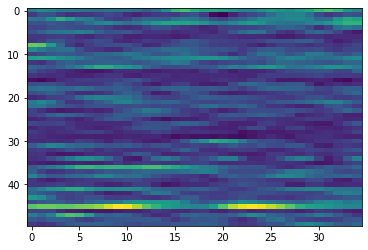

In [ ]:
plt.imshow(x[0,2],aspect='auto')

# **Load Data lapacian filter**


In [ ]:
FILEID = "1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_r0.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_r0.zip

--2020-11-19 15:37:32--  https://docs.google.com/uc?export=download&confirm=uXu9&id=1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3
Resolving docs.google.com (docs.google.com)... 108.177.121.101, 108.177.121.139, 108.177.121.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.121.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-0o-docs.googleusercontent.com/docs/securesc/5pfhn6doro37901enom5mv20sr3k0itv/5p28hnclgm1nme1fqkiaf2jii415s0lq/1605800250000/13064322042220169363/17363361215697490752Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download [following]
--2020-11-19 15:37:32--  https://doc-0o-0o-docs.googleusercontent.com/docs/securesc/5pfhn6doro37901enom5mv20sr3k0itv/5p28hnclgm1nme1fqkiaf2jii415s0lq/1605800250000/13064322042220169363/17363361215697490752Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download
Resolving doc-0o-0o-docs.googleusercontent.com (doc-0o-0o-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Conne

In [ ]:
x= loadmat('s1_r.mat')['resting_laplaciano']
x[:,0].shape
#recortar 5 segundo al final y a principio 
sfreq= 512  #frecuencia muestreo  
cut= 5    #segundos a corta
lng = x[:,0].shape
mues= cut * sfreq
xcut= x[mues:lng[0]-mues]
xcut=np.expand_dims(xcut.T, axis=0)


FileNotFoundError: ignored

In [ ]:
subs['S1'][0]

In [ ]:
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')
xtensor = []
subs_order = indx['S1'][0]
for i in subs_order:
  try:
    s=loadmat('Resting/s'+str(i)+'_r.mat')['resting_laplaciano']
    s=s[0:33792].T
    xtensor+=[s]
  except:
    print('s'+str(i+1)+'_r.mat')
xtensor= np.asarray(xtensor)
xtensor.shape

(50, 64, 33792)

#**funciones de Daniel -spectral connectivity**

In [ ]:
#%% descargar código de funciones  para motor imagery
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt

--2020-11-19 15:39:05--  https://docs.google.com/uc?export=download&confirm=&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 172.217.214.139, 172.217.214.102, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-20-docs.googleusercontent.com/docs/securesc/pvfo5bivp440bqav0hajj470mf4v83b5/papeo9u3cuc2ipv467dm2eo6rtnlfb57/1605800325000/06932581800131476027/08901374176278667753Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download [following]
--2020-11-19 15:39:05--  https://doc-0g-20-docs.googleusercontent.com/docs/securesc/pvfo5bivp440bqav0hajj470mf4v83b5/papeo9u3cuc2ipv467dm2eo6rtnlfb57/1605800325000/06932581800131476027/08901374176278667753Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download
Resolving doc-0g-20-docs.googleusercontent.com (doc-0g-20-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connectin

In [ ]:
import MIfunctions as MIf
#objeto de MIfunctions 
model = MIf.FB_feats(fs=512,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[1,55]]),feat='PLV')
x=model.transform(xtensor)

In [ ]:
x= x.reshape(50, int((64*(64-1))/2), 2, 1)
x.shape


(50, 2016, 2, 1)

In [ ]:
with open('connectivity.pickle', 'wb') as f:
    pickle.dump(x, f)

NameError: ignored

# **Work connectivity**

In [ ]:
FILEID = "1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectivity.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectivity.zip

--2020-11-19 15:47:35--  https://docs.google.com/uc?export=download&confirm=&id=1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh
Resolving docs.google.com (docs.google.com)... 108.177.112.100, 108.177.112.139, 108.177.112.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.112.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-bo-docs.googleusercontent.com/docs/securesc/c88rlf3nfn5rk7tphc4gu916ltc0f3s7/jk4ksuart3djaacu2m7udecbmgtrp6ns/1605800850000/17600740636788319470/14853847014702342735Z/1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh?e=download [following]
--2020-11-19 15:47:36--  https://doc-0o-bo-docs.googleusercontent.com/docs/securesc/c88rlf3nfn5rk7tphc4gu916ltc0f3s7/jk4ksuart3djaacu2m7udecbmgtrp6ns/1605800850000/17600740636788319470/14853847014702342735Z/1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh?e=download
Resolving doc-0o-bo-docs.googleusercontent.com (doc-0o-bo-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connectin

In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from scipy.stats import spearmanr, pearsonr

In [ ]:
X= pickle.load( open( "connectivity.pickle", "rb" ) )

In [ ]:
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [ ]:
a= X[:,:,:,0]
a.shape
estimator= SMRfeat()
frecuency_data = estimator.fit_transform(a)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.3min finished


-0.5892390667278925 6.735613782000542e-06
(-0.5892390667278922, 6.735613782000659e-06)
SpearmanrResult(correlation=-0.490493787032448, pvalue=0.0002990795359320988)


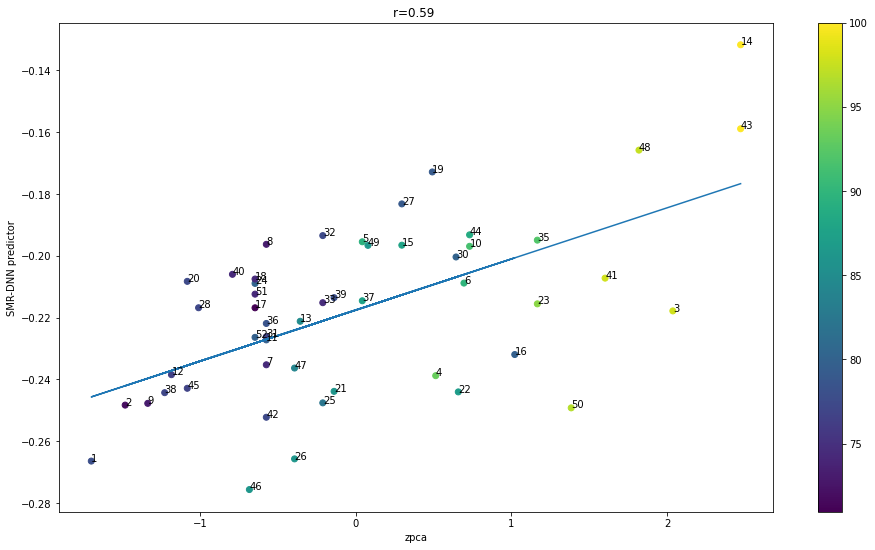

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# regression **2 - 0**

In [ ]:
FILEID = "1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectivity.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectivity.zip

In [ ]:
#%% descargar código de funciones  para motor imagery
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt

--2020-11-10 15:36:09--  https://docs.google.com/uc?export=download&confirm=&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 172.217.9.206, 2607:f8b0:4004:806::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-60-docs.googleusercontent.com/docs/securesc/o2r8crn4tqa9ra1rer01vanvjjhutgia/m1bd60lv9hfr7v7htlp6qb3nceied300/1605022500000/06932581800131476027/16253597760081818426Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download [following]
--2020-11-10 15:36:10--  https://doc-0c-60-docs.googleusercontent.com/docs/securesc/o2r8crn4tqa9ra1rer01vanvjjhutgia/m1bd60lv9hfr7v7htlp6qb3nceied300/1605022500000/06932581800131476027/16253597760081818426Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download
Resolving doc-0c-60-docs.googleusercontent.com (doc-0c-60-docs.googleusercontent.com)... 172.217.7.193, 2607:f8b0:4004:801::2001
Connecting to doc-0c-60-do

In [ ]:
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = []
for i in range(len(tipos)):
  if tipos[i]==2 or tipos[i]==0:
    newindx += [indx[i]]

xtensor = []
 
for i in newindx:
  try:
    s=loadmat('Resting/s'+str(i)+'_r.mat')['resting_laplaciano']
    s=s[0:33792].T
    xtensor+=[s]
  except:
    print('s'+str(i+1)+'_r.mat')
xtensor= np.asarray(xtensor)
xtensor.shape

(23, 64, 33792)

In [ ]:
import MIfunctions as MIf
#objeto de MIfunctions 
model = MIf.FB_feats(fs=512,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[1,55]]),feat='PLV')
x=model.transform(xtensor)
x= x.reshape(len(xtensor), int((64*(64-1))/2), 2, 1)
x.shape

(23, 2016, 2, 1)

In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle

In [ ]:
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [ ]:
#reshape data 
a= x[:,:,:,0]
print(a.shape)
estimator= SMRfeat()
frecuency_data = estimator.fit_transform(a)
    

(23, 2016, 2)


Epoch 1/200
1/1 [==============================] - 0s 153ms/step - loss: 432.5779 - val_loss: 440.7357
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 450.0078 - val_loss: 406.8409
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 414.0605 - val_loss: 427.0775
Epoch 4/200
1/1 [==============================] - 0s 29ms/step - loss: 421.1874 - val_loss: 415.7369
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 408.2112 - val_loss: 396.6831
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 388.4256 - val_loss: 376.2753
Epoch 7/200
1/1 [==============================] - 0s 29ms/step - loss: 372.1731 - val_loss: 357.4658
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 356.2887 - val_loss: 340.6095
Epoch 9/200
1/1 [==============================] - 0s 26ms/step - loss: 341.4313 - val_loss: 326.4292
Epoch 10/200
1/1 [==============================] - 0s 26ms/step - loss: 327.5654

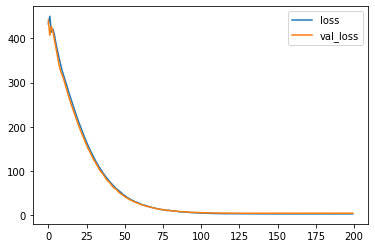

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==2 or tipos[i]==0:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
#zpca_all = [ma_z[:,2].reshape(-1,1)]

predictor= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = predictor.fit_predict(frecuency_data, zpca)

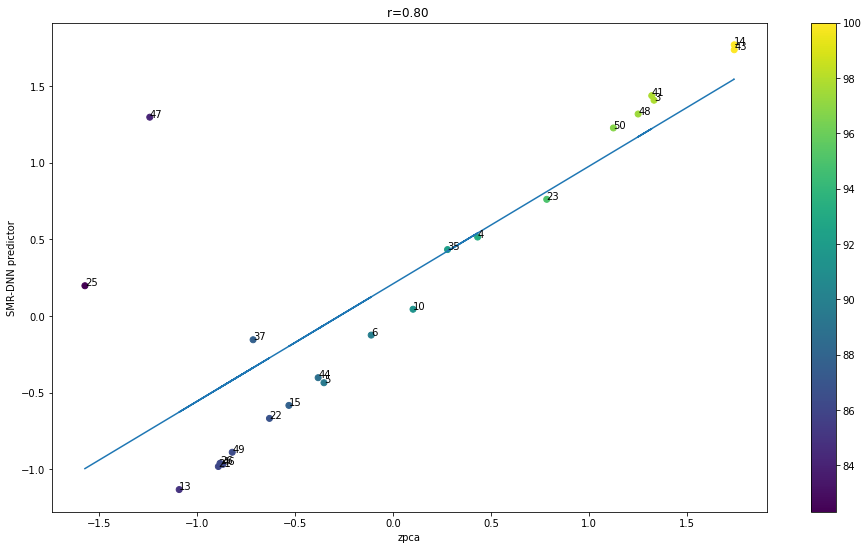

In [ ]:
indx = newindx
ypred = predict_data

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  2.6min finished


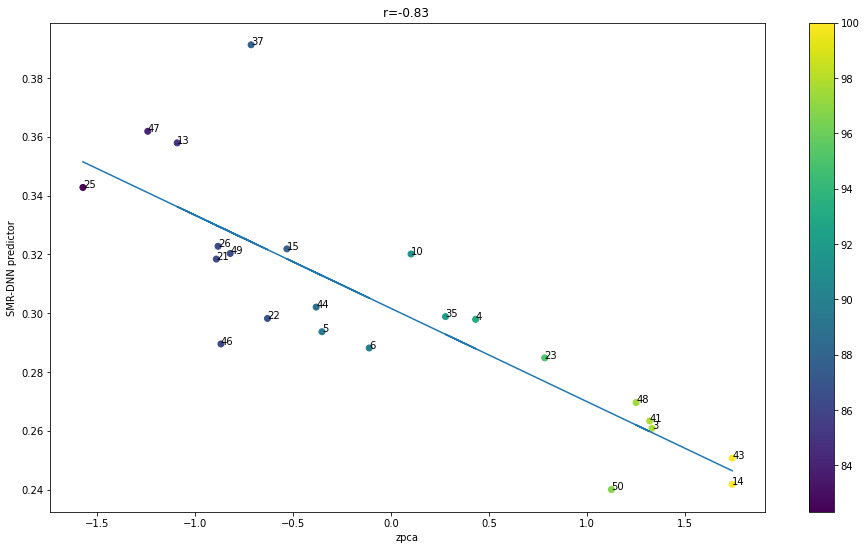

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
ypred

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# **regresor 2 - 1**

In [ ]:
FILEID = "1LiDYx1jN8VureYnw1Sqe2Iwl_4g1ISLh"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectivity.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectivity.zip

In [ ]:
#%% descargar código de funciones  para motor imagery
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt

In [ ]:
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = []
for i in range(len(tipos)):
  if tipos[i]==2 or tipos[i]==1:
    newindx += [indx[i]]

xtensor = []
 
for i in newindx:
  try:
    s=loadmat('Resting/s'+str(i)+'_r.mat')['resting_laplaciano']
    s=s[0:33792].T
    xtensor+=[s]
  except:
    print('s'+str(i+1)+'_r.mat')
xtensor= np.asarray(xtensor)
xtensor.shape

(35, 64, 33792)

In [ ]:
import MIfunctions as MIf
#objeto de MIfunctions 
model = MIf.FB_feats(fs=512,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[1,55]]),feat='PLV')
x=model.transform(xtensor)
x= x.reshape(len(xtensor), int((64*(64-1))/2), 2, 1)
x.shape

(35, 2016, 2, 1)

In [ ]:
#reshape data 
a= x[:,:,:,0]
print(a.shape)
estimator= SMRfeat()
frecuency_data = estimator.fit_transform(a)
    

(35, 2016, 2)


Epoch 1/200
1/1 [==============================] - 0s 152ms/step - loss: 432.5626 - val_loss: 424.5077
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 441.6009 - val_loss: 409.7047
Epoch 3/200
1/1 [==============================] - 0s 28ms/step - loss: 414.6101 - val_loss: 407.0830
Epoch 4/200
1/1 [==============================] - 0s 31ms/step - loss: 412.8097 - val_loss: 391.2621
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 394.8441 - val_loss: 370.7540
Epoch 6/200
1/1 [==============================] - 0s 27ms/step - loss: 376.6156 - val_loss: 354.2832
Epoch 7/200
1/1 [==============================] - 0s 25ms/step - loss: 358.8712 - val_loss: 343.3792
Epoch 8/200
1/1 [==============================] - 0s 26ms/step - loss: 343.4155 - val_loss: 332.0976
Epoch 9/200
1/1 [==============================] - 0s 27ms/step - loss: 332.7641 - val_loss: 319.2808
Epoch 10/200
1/1 [==============================] - 0s 27ms/step - loss: 321.0040

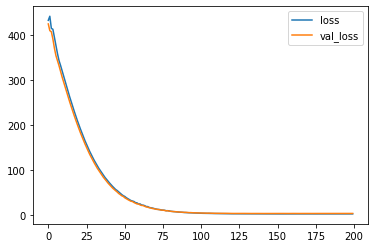

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==2 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
#zpca_all = [ma_z[:,2].reshape(-1,1)]

predictor= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = predictor.fit_predict(frecuency_data, zpca)

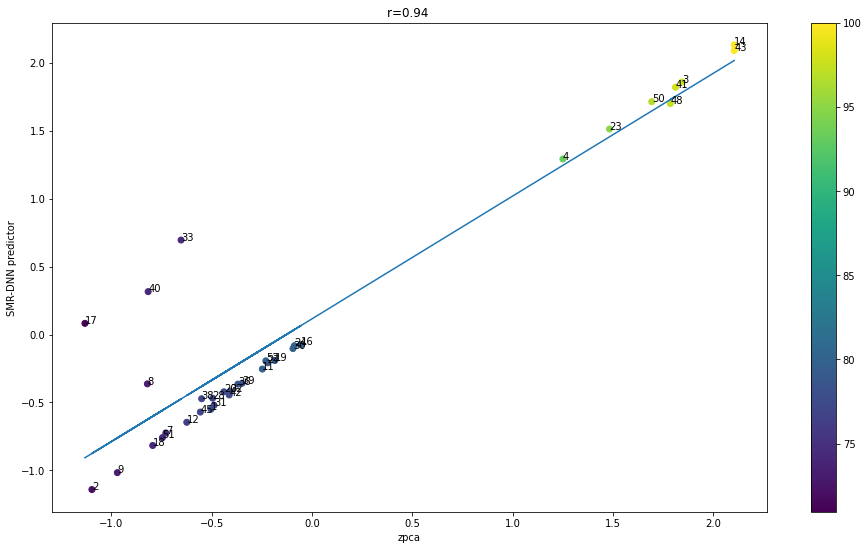

In [ ]:
indx = newindx
ypred = predict_data

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.9min finished


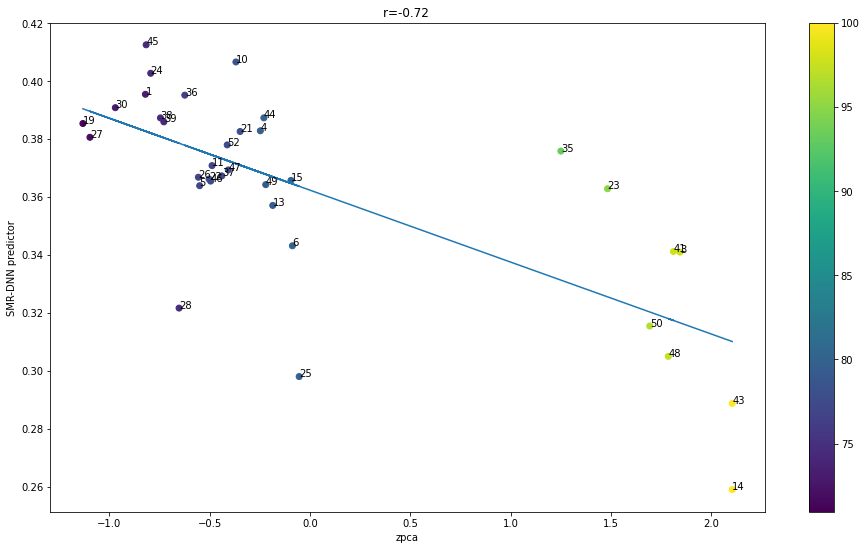

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
ypred

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# **regression 0 - 1**


In [ ]:
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = []
for i in range(len(tipos)):
  if tipos[i]==0 or tipos[i]==1:
    newindx += [indx[i]]

xtensor = []
 
for i in newindx:
  try:
    s=loadmat('Resting/s'+str(i)+'_r.mat')['resting_laplaciano']
    s=s[0:33792].T
    xtensor+=[s]
  except:
    print('s'+str(i+1)+'_r.mat')
xtensor= np.asarray(xtensor)
xtensor.shape

(42, 64, 33792)

In [ ]:
import MIfunctions as MIf
#objeto de MIfunctions 
model = MIf.FB_feats(fs=512,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[1,55]]),feat='PLV')
x=model.transform(xtensor)
x= x.reshape(len(xtensor), int((64*(64-1))/2), 2, 1)
x.shape

(42, 2016, 2, 1)

In [ ]:
#reshape data 
a= x[:,:,:,0]
print(a.shape)
estimator= SMRfeat()
frecuency_data = estimator.fit_transform(a)

(42, 2016, 2)


Epoch 1/200
2/2 [==============================] - 0s 84ms/step - loss: 431.2763 - val_loss: 421.7697
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 435.7598 - val_loss: 414.8210
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 417.6198 - val_loss: 387.8101
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 392.8153 - val_loss: 367.2716
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 368.9964 - val_loss: 341.6264
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 346.6075 - val_loss: 327.8512
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 328.8426 - val_loss: 312.2111
Epoch 8/200
2/2 [==============================] - 0s 23ms/step - loss: 312.6417 - val_loss: 298.4897
Epoch 9/200
2/2 [==============================] - 0s 22ms/step - loss: 297.1054 - val_loss: 284.2257
Epoch 10/200
2/2 [==============================] - 0s 21ms/step - loss: 281.5862 

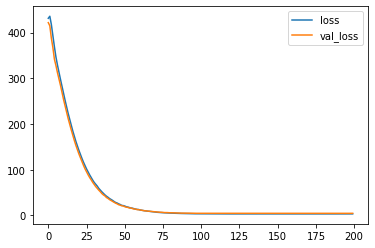

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==0 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
#zpca_all = [ma_z[:,2].reshape(-1,1)]

predictor= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = predictor.fit_predict(frecuency_data, zpca)

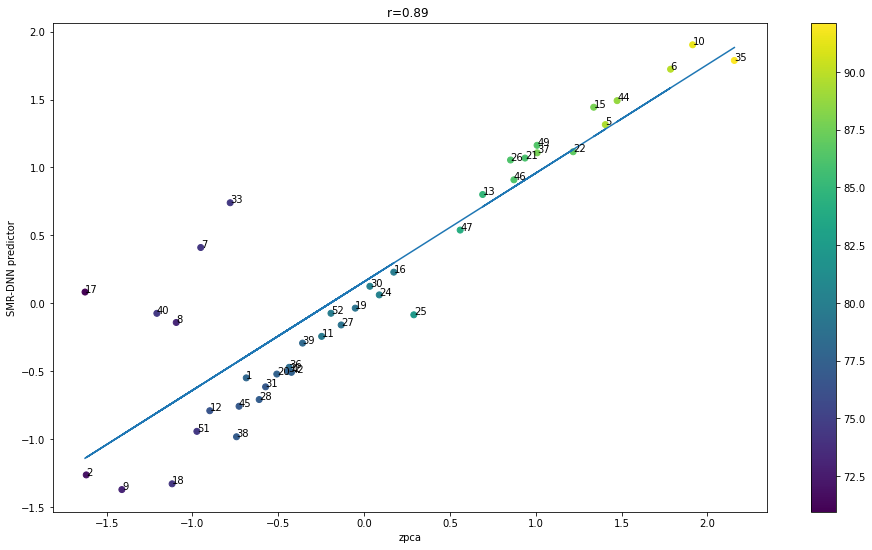

In [ ]:
indx = newindx
ypred = predict_data

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  7.0min finished


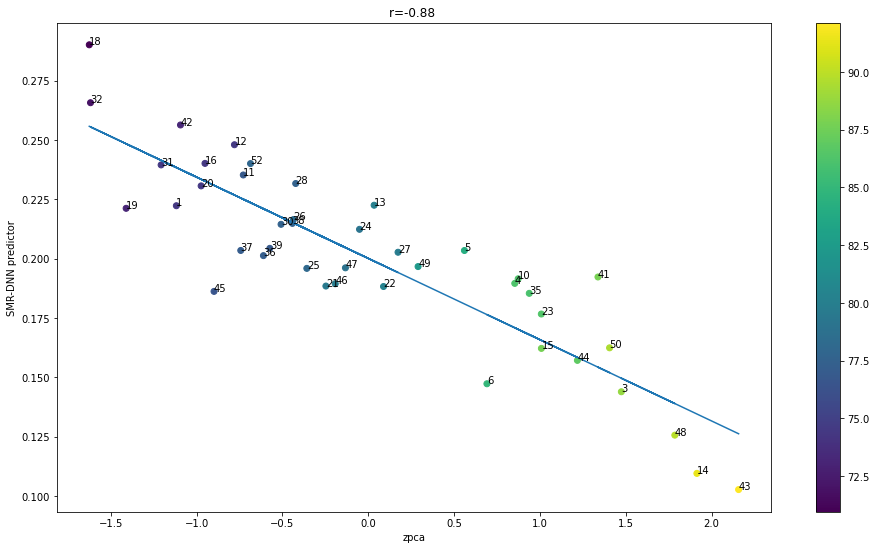

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
ypred

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()